In [2]:
# August 14th, 2019

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
ri = pd.read_csv('police.csv')
ted = pd.read_csv('ted.csv')

In [7]:
ri.head()
# NaN missing values ..
# why? It wasn't recorded in the time. Data corruption. Irrevelant.

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [8]:
ri.shape

(91741, 15)

In [9]:
ri.dtypes

stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

In [10]:
ri.isnull().sum()
# the sum of null values in every columns 

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

## Removing Columns

In [11]:
# 1. Remove the column that only contains missing values
ri.drop('county_name', axis='columns', inplace=True)

In [12]:
ri.shape

(91741, 14)

In [13]:
ri.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [14]:
ri.dropna(axis='columns', how='all').shape

(91741, 14)

## Comparing Groups

In [17]:
## 2. Do men or women speed more often?
## driver_gender, violation

# filter the dataset first
ri[ri.violation == 'Speeding'].driver_gender.value_counts(normalize=True)

M    0.680527
F    0.319473
Name: driver_gender, dtype: float64

In [20]:
 ri[ri.driver_gender == 'M'].violation.value_counts(normalize=True)

Speeding               0.524350
Moving violation       0.207012
Equipment              0.135671
Other                  0.057668
Registration/plates    0.038461
Seat belt              0.036839
Name: violation, dtype: float64

In [21]:
 ri[ri.driver_gender == 'F'].violation.value_counts(normalize=True)

Speeding               0.658500
Moving violation       0.136277
Equipment              0.105780
Registration/plates    0.043086
Other                  0.029348
Seat belt              0.027009
Name: violation, dtype: float64

In [22]:
ri.groupby('driver_gender').violation.value_counts(normalize=True)

# What other type of data are missing?
# we dont know how many miles they drove.
# we dont know the number of female and male drivers.

driver_gender  violation          
F              Speeding               0.658500
               Moving violation       0.136277
               Equipment              0.105780
               Registration/plates    0.043086
               Other                  0.029348
               Seat belt              0.027009
M              Speeding               0.524350
               Moving violation       0.207012
               Equipment              0.135671
               Other                  0.057668
               Registration/plates    0.038461
               Seat belt              0.036839
Name: violation, dtype: float64

## Examining relationships 

In [23]:
## 3. Does gender affect who gets searched during a stop?
## driver_gender, search_conducted

ri.search_conducted.value_counts(normalize=True)

False    0.965163
True     0.034837
Name: search_conducted, dtype: float64

In [24]:
ri.search_conducted.value_counts()

False    88545
True      3196
Name: search_conducted, dtype: int64

In [26]:
ri.search_conducted.mean()

0.03483720473942948

In [27]:
ri.groupby('driver_gender').search_conducted.mean()

driver_gender
F    0.020033
M    0.043326
Name: search_conducted, dtype: float64

In [28]:
# What was the cause? We need to learn the factors
  
ri.groupby(['violation', 'driver_gender']).search_conducted.mean()

violation            driver_gender
Equipment            F                0.042622
                     M                0.070081
Moving violation     F                0.036205
                     M                0.059831
Other                F                0.056522
                     M                0.047146
Registration/plates  F                0.066140
                     M                0.110376
Seat belt            F                0.012598
                     M                0.037980
Speeding             F                0.008720
                     M                0.024925
Name: search_conducted, dtype: float64

## Handling Missing Data 

In [30]:
## Why is search_type missing so often?

ri.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [31]:
ri.search_conducted.value_counts()

False    88545
True      3196
Name: search_conducted, dtype: int64

In [36]:
ri[ri.search_conducted == False].search_type.value_counts(dropna=False)

NaN    88545
Name: search_type, dtype: int64

In [37]:
ri.search_type.value_counts(dropna=False)

NaN                                                         88545
Incident to Arrest                                           1219
Probable Cause                                                891
Inventory                                                     220
Reasonable Suspicion                                          197
Protective Frisk                                              161
Incident to Arrest,Inventory                                  129
Incident to Arrest,Probable Cause                             106
Probable Cause,Reasonable Suspicion                            75
Incident to Arrest,Inventory,Probable Cause                    34
Incident to Arrest,Protective Frisk                            33
Probable Cause,Protective Frisk                                33
Inventory,Probable Cause                                       22
Incident to Arrest,Reasonable Suspicion                        13
Protective Frisk,Reasonable Suspicion                          11
Incident t

## Using String Methods

In [47]:
## 5. During a searched how often is the driver frisked?

ri['frisk'] = ri.search_type.str.contains('Protective Frisk')

In [48]:
ri.frisk.value_counts(dropna=False)

NaN      88545
False     2922
True       274
Name: frisk, dtype: int64

In [49]:
ri.frisk.sum()

274

In [50]:
ri.frisk.mean()

0.08573216520650813

In [51]:
 274 / (274+2922) # verifies the mean 

0.08573216520650813

## Combining dates & times 

In [52]:
## 6. Which year had the least number of stops?

ri.stop_date.str.slice(0,4).  value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_date, dtype: int64

In [53]:
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')
combined

0        2005-01-02 01:55
1        2005-01-18 08:15
2        2005-01-23 23:15
3        2005-02-20 17:15
4        2005-03-14 10:00
5        2005-03-23 09:45
6        2005-04-01 17:30
7        2005-06-06 13:20
8        2005-07-13 10:15
9        2005-07-13 15:45
10       2005-07-13 16:20
11       2005-07-13 19:00
12       2005-07-14 19:55
13       2005-07-18 19:30
14       2005-07-18 19:45
15       2005-07-19 00:30
16       2005-07-19 00:30
17       2005-07-19 23:30
18       2005-07-20 00:05
19       2005-07-24 20:10
20       2005-07-28 12:37
21       2005-08-07 16:50
22       2005-08-08 02:09
23       2005-08-18 10:57
24       2005-08-28 01:00
25       2005-09-03 16:02
26       2005-09-17 10:54
27       2005-09-21 13:30
28       2005-09-22 22:34
29       2005-09-26 01:05
               ...       
91711    2015-12-30 15:42
91712    2015-12-30 16:19
91713    2015-12-30 17:07
91714    2015-12-30 17:39
91715    2015-12-30 23:26
91716    2015-12-30 23:33
91717    2015-12-31 00:00
91718    201

In [54]:
ri['stop_datetime'] = pd.to_datetime(combined) 
# new column in which we combined stop_date & stop_time

In [55]:
ri.stop_datetime

0       2005-01-02 01:55:00
1       2005-01-18 08:15:00
2       2005-01-23 23:15:00
3       2005-02-20 17:15:00
4       2005-03-14 10:00:00
5       2005-03-23 09:45:00
6       2005-04-01 17:30:00
7       2005-06-06 13:20:00
8       2005-07-13 10:15:00
9       2005-07-13 15:45:00
10      2005-07-13 16:20:00
11      2005-07-13 19:00:00
12      2005-07-14 19:55:00
13      2005-07-18 19:30:00
14      2005-07-18 19:45:00
15      2005-07-19 00:30:00
16      2005-07-19 00:30:00
17      2005-07-19 23:30:00
18      2005-07-20 00:05:00
19      2005-07-24 20:10:00
20      2005-07-28 12:37:00
21      2005-08-07 16:50:00
22      2005-08-08 02:09:00
23      2005-08-18 10:57:00
24      2005-08-28 01:00:00
25      2005-09-03 16:02:00
26      2005-09-17 10:54:00
27      2005-09-21 13:30:00
28      2005-09-22 22:34:00
29      2005-09-26 01:05:00
                ...        
91711   2015-12-30 15:42:00
91712   2015-12-30 16:19:00
91713   2015-12-30 17:07:00
91714   2015-12-30 17:39:00
91715   2015-12-30 2

In [56]:
ri.stop_datetime.dt.year.value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_datetime, dtype: int64


## Plotting a time series

In [58]:
## 7. How does drug activity change by time of day?
# stop_datetime, drug_related_stop

ri.drugs_related_stop.mean()

0.008883705213590434

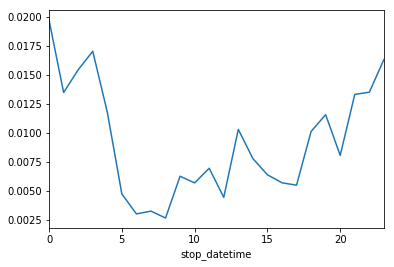

In [60]:
# Check the rate of time where it increases/dropped

ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.mean().plot()

## Creating Useful Plots

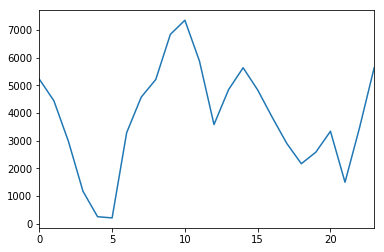

In [68]:
## 8. Do most stop occur at night?

ri.stop_datetime.dt.hour.value_counts().sort_index().plot()

# reset the time index

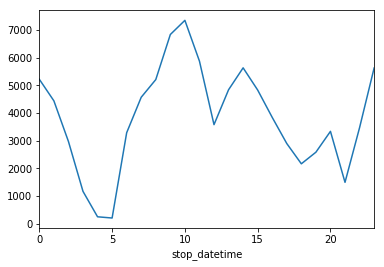

In [69]:
ri.groupby(ri.stop_datetime.dt.hour).stop_datetime.count().plot()

## Fixing Bad Data

In [72]:
## 9. Find the bad data in the stop_duration column and fix it

ri.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
2                1
1                1
Name: stop_duration, dtype: int64

In [76]:
ri.loc[(ri.stop_duration == '1') | (ri.stop_duration == '2'), 'stop_duration'] = 'NaN'

In [73]:
ri.stop_duration.dtype

#object type

dtype('O')

In [77]:
ri.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
NaN              2
Name: stop_duration, dtype: int64

In [78]:
import numpy as np

In [79]:
ri.loc[ri.stop_duration == 'NaN', 'stop_duration'] = np.nan

In [80]:
ri.stop_duration.value_counts(dropna=False)

# much better 

0-15 Min     69543
16-30 Min    13635
NaN           5335
30+ Min       3228
Name: stop_duration, dtype: int64

In [ ]:
ri.loc[ri.stop_duration == 'NaN', ['stop_duration','stop_date']] = np.nan

# we can select multiple columns using loc